<img src="/static/base/images/logo.png?v=641991992878ee24c6f3826e81054a0f" alt="Jupyter Notebook">
<h1 style="text-align: center">Notebook 3 - Cybersecurity Analytics</h1>

<h3>Prerequisites</h3>

- You must have R installed on your system (<a href="https://cran.r-project.org/bin/">Download: Follow "base" links</a>)
- You must have Jupyter installed on your system (<a href="https://jupyter.org/install">Download</a>)
- Some knowledge of R may be required

<h3>Explanation of Notebook 3</h3>

In this notebook, you'll explore two techniques used for instrution detection; 
+ K-Means Clustering (Unsupervised - Uses unlabeled input data and allows the algorithm to act on that information without guidance)
+ Decision Tree Classification (Supervised - Learn from the past input data and makes future prediction as output)

There will be different types of data visualisation involved in this notebook, and you must use them for the analysis.<br>
You will only use R throughout this notebook.

The data will be in csv format.

Due to the large amount of data used in this notebook, the cells will already have pre-data to reduce time consumption.

<h3>Getting started</h3>

You will require four packages for the scripts in this lab to work:
+ cluster
+ c50
+ e1071
+ ggplot2 

Run the cell below to install the packages.


In [ ]:
install.packages(c("cluster","C50","e1071","ggplot2"))

<h3>Overview</h3>

+ This notebook will be based on a scenario known as 'KDD-CUP-99' which is for a typical U.S. Air Force LAN (Local Area Network).
+ The duration is 9 weeks; 7 weeks of training, 2 weeks of testing.
+ The size of the original dataset is 4GB of compressed binary TCP dump data, which is approximately 5 million connection records.

<h4>What is a connection?</h4>

It is a sequence of TCP packets starting and ending at some well defined times, between which data flows to and from a source IP address to a target IP address under some well defined protocol.<br>

+ Each connection is labelled either _normal_, or as an _attack_, with exactly one attack type.<br>
+ Each connection record consists about 100 bytes.

<h4>Attacks</h4>

These two techniques will be used to analyse cyber security attacks which fall under four main categories:
+ DOS - Denial Of Service
+ R2L - Unauthorised access from a remote machine
+ U2R - Unauthorised access to local superuser privileges
+ Probing - Surveillance and other probing

<h4>Features</h4>

There are 41 features in total, however, those 41 features are divided into two type to help distinguish normal connections from attacks:

+ Raw features (e.g <code>flag</code>, <code>src_bytes</code>)
+ Derived 'higher-level' features (e.g <code>serror rate</code>, <code>count</code>)

Each feature has its own name, description, and type; all of the 41 features are shown as a table below.

|  #  | Feature Name | Description      |     Type     |
|-----|--------------|------------------|--------------|
|  1  | duration     | length (number of seconds) of the connection) | Continuous |
|  2  | protocol_type     | type of the protocol, e.g. tcp, udp, etc. | Discrete |
|  3  | service     | network service on the destination, e.g., http, telnet, etc. | Discrete |
|  4  | flag     | normal or error status of the connection | Discrete |
|  5  | src_bytes     | number of data bytes from source to destination | Continuous |
|  6  | dst_bytes     | number of data bytes from destination to source | Continuous |
|  7  | land     | 1 if connection is from/to the same host/port; 0 otherwise | Discrete |
|  8  | wrong_fragment     | number of "wrong" fragments | Continuous |
|  9  | urgent     | number of urgent packets | Continuous |
|  10  | hot     | number of "hot" indicators | Continuous |
|  11  | num_failed_logins     | number of failed login attempts | Continuous |
|  12  | logged_in     | 1 if successfully logged in; 0 otherwise  | Discrete |
|  13  | num_compromised     | number of "compromised" conditions | Continuous |
|  14  | root_shell     | 1 if root shell is obtained; 0 otherwise | Discrete |
|  15  | su_attempted     | 1 if "su root" command attempted; 0 otherwise | Discrete |
|  16  | num_root     | number of "root" accesses | Continuous |
|  17  | num_file_creations     | number of file creation operations | Continuous |
|  18  | num_shells     | number of shell prompts | Continuous |
|  19  | num_access_files     | number of operations on access control files | Continuous |
|  20  | num_outbound_cmds     | number of outbound commands in an ftp session | Continuous |
|  21  | is_host_login     | 1 if the login belongs to the "hot" list; 0 otherwise | Discrete |
|  22  | is_guest_login     | 1 if the login is a "guest"login; 0 otherwise | Discrete |
|  23  | count     | number of connections to the same host as the current connection in the past two seconds | Continuous |
|  24  | srv_count     | number of connections to the same service as the current connection in the past two seconds | Continuous |
|  25  | serror_rate     | % of connections that have "SYN" errors | Continuous |
|  26  | srv_serror_rate     | % of connections that have "SYN" errors | Continuous |
|  27  | rerror_rate     | % of connections that have "REJ" errors | Continuous |
|  28  | srv_rerror_rate     | % of connections that have "REJ" errors | Continuous |
|  29  | same_srv_rate     | % of connections to the same service | Continuous |
|  30  | diff_srv_rate     | % of connections to different services | Continuous |
|  31  | srv_diff_host_rate     | % of connections to different hosts | Continuous |
|  32  | dst_host_count     | | Continuous |
|  33  | dst_host_srv_count     | | Continuous |
|  34  | dst_host_same_srv_count     | | Continuous |
|  35  | dst_host_diff_srv_count     | | Continuous |
|  36  | dst_host_same_src_port_rate     | | Continuous |
|  37  | dst_host_srv_diff_host_rate     | | Continuous |
|  38  | dst_host_serror_rate     | | Continuous |
|  39  | dst_host_srv_serror_rate     | | Continuous |
|  40  | dst_host_rerror_rate     | | Continuous |
|  41  | dst_host_srv_rerror_rate     | | Continuous |

<h3>What is <i>k</i>-means clustering?</h3>

Clustering is a form of unsupervised learning, which is employed in the analysis of unlabelled data that is not categorised or grouped or when not a lot is known about the data.

<i>k</i>-means is a clustering algorithm that is partition-based, and it is commonly used in intrusion detection due to the transparent analysis it provides of clustered data.

What this means is that it groups the data into __k__ number of groups, known as clusters, based on similarity measure.<br>
Based on the features, it iteratively assigns points to each cluster so that each point is similar to those within the cluster and dissimilar to those outside the cluster. 

There's two things <i>k</i>-means output:
+ The centroids/centre points of each cluster
+ The clustering assignments where each point is assigned to exactly one cluster

The below shows an example of the use of <i>k</i>-means clustering:

<img src="http://pypr.sourceforge.net/_images/kmeans_2d.png">
          
In the left, you can see the raw data without any clusters, whereas in the right, you can see that the clusters are applied as the data is separated into 3 groups using <font color='red'>red</font>, <font color='green'>green</font>, and <font color='blue'>blue</font>, meaning that the __k__ is 3.
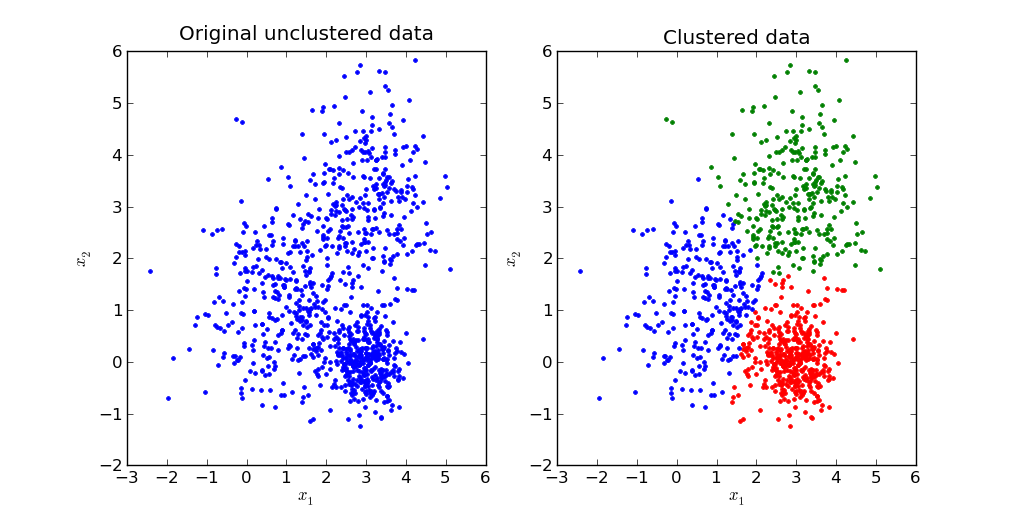

<h3>Activity 1</h3>

For the first activity, we will use the following csv file: "cslab-kddcupdata-corrected-train.csv".

Using this, we will:

1. Identify k through analysing the within groups sum of squares
2. Perform k-means clustering with identified k value
3. Identify any relationships between clusters and attacks

Before proceeding with any of the three tasks, first you must load the installed libraries, which for now, will be 'cluster' and 'ggplot2'.

In [4]:
library(cluster)
library(ggplot2)

Afterwards, we will load the csv file:

In [5]:
kdddata.train <- read.csv(file = "data/cslab-kddcupdata-corrected-train.csv", sep = ',', header = TRUE)

The csv file's rows are separated by a comma (','), and since the csv file's first row has all the headers for the rows, it will not read the first row as part of the data, and so upon running the cell above and below, it will display the entire csv file as a table with headers.

In [ ]:
kdddata.train

After this, we must pre-process this data

In [6]:
#This select only numerical features
data <- kdddata.train[,6:40] #Select from column 6 to column 40, subsetting by rows (using the comma)

#This deletes all the empty/missing features
data <- na.omit(data)  #Omits the not available data after selection

#This scales the data
subdata <- scale(data) #Standardises each value in the dataset

Now that the data is pre-processed, you can finally identify __k__, the number of clusters.

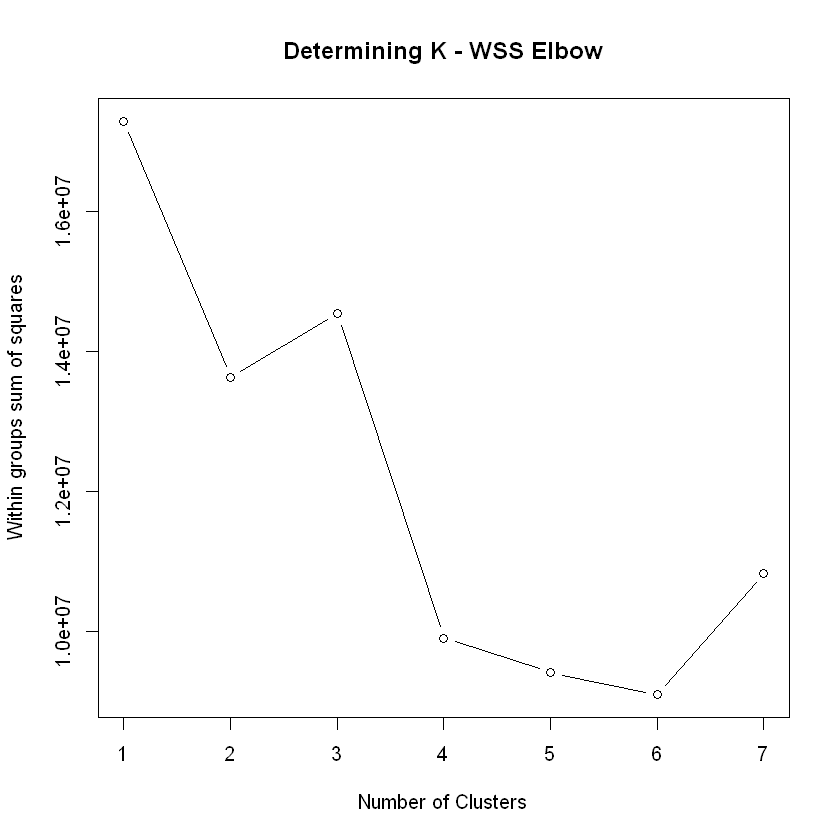

In [7]:
#Gets the mean distance between data points and cluster centroids
wss <- (nrow(subdata)-1)*sum(apply(subdata,2,var)) #nrow is used to caculate the amount of rows
for (i in 2:7) wss[i] <- sum(kmeans(subdata, centers=i)$withinss) #i = centroids

#Plots the clusters
plot(1:7, wss, type="b", xlab="Number of Clusters", ylab="Within groups sum of squares", main="Determining K - WSS Elbow")

Running the cell above will display a plotted graph with multiple clusters using the "elbow" method.<br>

But which one of the clusters is __k__?<br>
Generally, it is the number that the curve usually bend upon, hence the name "elbow" for the method, if the connecting line has a sudden change on a number, that is an indicator of the _k_.

We will assume that the __k__ is 4, because the plotted graph that was shown during the making of this notebook displayed a pivotal point compared to the other numbers.

You may also notice that every time you run the cell above, it turns out slightly different as well.

Now we can perform clustering as we now have the __k__ value.

In [21]:
options(repr.matrix.max.rows=1000, repr.matrix.max.cols=50)

The above cell will set the limit of the maximum amount of rows to 1000 and columns to 50, however, the frame contains around 490,000 rows with 45 columns, which means you'll only be able to see 2% of the data.<br>

Something __important__ you need to note is that higher the number of rows, the slower it is to load the data.<br>
You should choose your own value for the rows for this for performance reasons.

By default, it's set to 600 rows and 200 columns, which restricts us from seeing all the data.

In [22]:
#Perform K-Means Clustering
fit <- kmeans(subdata, 4) # *** Change integer to reflect your k value based on your graph!***

#Get cluster means
results <- aggregate(subdata,by=list(fit$cluster),FUN=mean) #Aggregates the data by getting the mean of each cluster
results

#Append cluster assignment
data <- data.frame(data, fit$cluster)

#Append attack
data <- data.frame(data, kdddata.train$attack)
data

Group.1,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.0029422728,-0.0256092976,-0.006673411,-0.04772014,-0.002571465,-0.04027460,0.122344679,-0.4122600,-0.005346967,-0.010551942,-0.004675666,-0.005640006,-0.011232070,-0.0099189649,-0.027631788,-0.037262625,-0.8968819,-1.1554449,-0.4638327,-0.4629740,4.0668869,4.0470666,-1.3111687,0.3690982,0.10875252,-0.39296554,-1.3136730,-1.2699846,0.4498191,-1.07221461,0.596082034,-0.4633837,-0.4622946,4.0294739,4.0144665
2,-0.0009308359,0.0079457434,-0.006673411,-0.04315608,-0.002571465,0.01248038,-0.008565035,0.1313489,-0.002194371,-0.001344472,-0.004675666,-0.002567065,-0.004123081,0.0001208238,0.005728079,0.009874637,0.2534933,0.3824496,-0.4630916,-0.4623640,-0.2463245,-0.2445553,0.5356860,-0.2513204,0.03870885,-0.05283880,0.5299021,0.5399124,-0.2558162,0.36996593,-0.006200762,-0.4629829,-0.4625533,-0.2457326,-0.2421607
3,0.0693566503,-0.0001458901,0.327518695,2.17056887,0.126202783,0.02753858,0.068597547,-0.1493247,0.146346447,0.171993759,0.229473061,0.161366900,0.282099327,0.1096626093,0.102962993,0.055358512,-1.1996596,-1.1641147,-0.3533451,-0.3696877,0.3733708,0.3677052,-0.2260157,3.8608435,0.03039438,0.03948217,-1.6154505,-1.6355126,5.6180403,0.01111044,-0.002532813,-0.3602609,-0.3702958,0.4900152,0.3738233
4,-0.0030007637,-0.0260053253,-0.006673411,-0.04772014,-0.002571465,-0.04398849,-0.009039481,-0.4166074,-0.005614584,-0.010551942,-0.004675666,-0.005640006,-0.010992974,-0.0099189649,-0.027631788,-0.036952869,-0.6690764,-1.1440020,2.1616139,2.1600990,-0.2476243,-0.2484096,-1.8570570,0.5203685,-0.20241788,0.34269373,-1.6735892,-1.7275723,0.3148105,-1.25004216,-0.157510229,2.1617974,2.1607665,-0.2518493,-0.2492549


src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,fit.cluster,kdddata.train.attack,fit.cluster.1,kdddata.train.attack.1,fit.cluster.2,kdddata.train.attack.2
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<int>,<fct>,<int>,<fct>
181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0,0,1.00,0.00,0.00,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0,0,4,normal.,2,normal.,2,normal.
239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0,0,1.00,0.00,0.00,19,19,1.00,0.00,0.05,0.00,0.00,0.00,0,0,4,normal.,2,normal.,2,normal.
235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0,0,1.00,0.00,0.00,29,29,1.00,0.00,0.03,0.00,0.00,0.00,0,0,4,normal.,2,normal.,2,normal.
219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0,0,1.00,0.00,0.00,39,39,1.00,0.00,0.03,0.00,0.00,0.00,0,0,4,normal.,2,normal.,2,normal.
217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0,0,1.00,0.00,0.00,49,49,1.00,0.00,0.02,0.00,0.00,0.00,0,0,4,normal.,2,normal.,2,normal.
217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0,0,1.00,0.00,0.00,59,59,1.00,0.00,0.02,0.00,0.00,0.00,0,0,4,normal.,2,normal.,2,normal.
212,1940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2,0.00,0.00,0,0,1.00,0.00,1.00,1,69,1.00,0.00,1.00,0.04,0.00,0.00,0,0,4,normal.,2,normal.,2,normal.
159,4087,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5,5,0.00,0.00,0,0,1.00,0.00,0.00,11,79,1.00,0.00,0.09,0.04,0.00,0.00,0,0,4,normal.,2,normal.,2,normal.
210,151,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0,0,1.00,0.00,0.00,8,89,1.00,0.00,0.12,0.04,0.00,0.00,0,0,4,normal.,2,normal.,2,normal.


Running the cell above will give us the <i>k</i>-means clustering.

In the first table, you can see the cluster means, whereas in the second table, you can see all the attacks along with the clusters appended to them.<br>
The number of rows the first table will have will depend on the amount of clusters defined in the clustering.

As we mentioned, for the second table, it will be too hard to show all of the rows due to performance issues, but there's a trick around this, and that's by filtering; most of the time, it will only show one of the clusters as there's too many rows, but you can filter the table by the cluster number and experiment with the row amount to display other clusters.

The column <code>fit.cluster</code> will display the cluster the row belongs to.

In [ ]:
data[data$fit.cluster == 3, ]

The cell above will return the table filtered by cluster 3, you can change it to other clusters to return different values

Now, using this, we can identify any relationships between the clusters and the attacks:

+ If the column/feature <code>num_failed_logins</code> in a row has a value of more than 1, it may be a sign of R2L (e.g guessing password) as the attackers usually attempts to login multiple times with different credentials.

+ If the column/feature <code>count</code> in a row has a value of more than 1, it means that multiple connections were sent to the same host in the past two seconds, which is a sign of probing attack (e.g port scanning).

+ If the column/feature <code>src_bytes</code> in a row has a high/anomaly value, it is a sign of a DOS attack (e.g syn flood) as the attack works by 'flooding' the victim with data to lose the victim's connection.

+ If the column/feature <code>count</code> in a row has only a value of 1, it means that only one connection is involved, which is normal, but it can also indicate U2R (e.g various "buffer overflow" attacks).

Using these, you can conclude which if there are any attacks and which cluster is more towards which attack.

<h3>Decision Tree Classification</h3>

Decision trees construct tree-like structures using a series of boolean functions (e.g "yes" or "no" questions based on the characteristics of a set of variables) until no more relevant branches can be derived.

New data items can then be classified at the root node (The note at the very top) and moving down through the branches until a leaf node (A node without any child nodes) is reached and a classification is obtained.

They can be either binary or multi-branch trees; below shows the differences.

<img src="https://i.imgur.com/Ij1pOpZ.png">

+ Binary trees can only have nodes with maximum of 2 child nodes.
+ Multi-branch trees can have nodes with more than 2 child nodes.
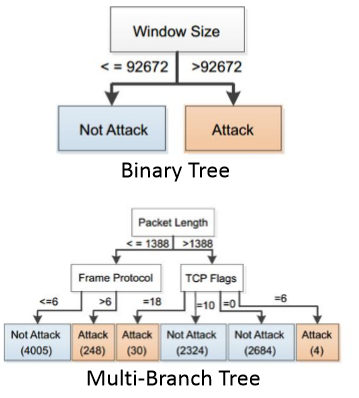

<h3>Activity 2</h3>

1. Build a C5.0 decision tree model on the training data.
2. What issues do you notice with the tree model?
3. Test the model on the test data. How does it perform?
4. Select subsets of features and rerun the classification.

To do these four tasks, you must load the 'c50' library; this is because we are building a c5.0 decision tree model.

In [ ]:
library(C50)

Next you must import the data from the csv files, we will use both; training and testing data.

In [2]:
kdddata.train<- read.csv(file = "data/cslab-kddcupdata-corrected-train.csv", sep = ',', header = TRUE) #Training data
kdddata.test <- read.csv(file = "data/cslab-kddcupdata-corrected-test.csv", sep = ',', header = TRUE) #Testing data

Both of the files are separated by commas and contains headers.<br>
We will then make a c5.0 decision tree model based on the training data.

In [3]:
#Build model
model <- C50::C5.0(kdddata.train[,2:42], kdddata.train[,1] )  #Select columns from 2 to 42 

#View model
summary(model)


Call:
C5.0.default(x = kdddata.train[, 2:42], y = kdddata.train[, 1])


C5.0 [Release 2.07 GPL Edition]  	Tue Jul 09 11:31:41 2019
-------------------------------

Class specified by attribute `outcome'

Read 494021 cases (42 attributes) from undefined.data

Decision tree:

wrong_fragment > 0:
:...protocol_type = icmp: pod. (259)
:   protocol_type in {tcp,udp}: teardrop. (979)
wrong_fragment <= 0:
:...service = ecr_i:
    :...src_bytes > 292: smurf. (280790)
    :   src_bytes <= 292:
    :   :...src_bytes <= 19: ipsweep. (6/2)
    :       src_bytes > 19: normal. (345)
    service in {auth,bgp,courier,csnet_ns,ctf,daytime,discard,domain,domain_u,
    :           echo,eco_i,efs,exec,finger,ftp,ftp_data,gopher,hostnames,http,
    :           http_443,imap4,IRC,iso_tsap,klogin,kshell,ldap,link,login,mtp,
    :           name,netbios_dgm,netbios_ns,netbios_ssn,netstat,nnsp,nntp,
    :           ntp_u,other,pm_dump,pop_2,pop_3,printer,private,red_i,
    :           remote_job,rje,shell,smtp

You can see that the cell above creates a treelike model, yet potrays it using dots; the lines that end with a colon are simply 'if' statements (parent nodes) to determine the route (child nodes) based on the feature's value, this will help you identify more attacks.

There are multiple subtrees, however, there are at max 2 child nodes for each parent node, meaning that it mostly consists of binary trees rather than multi-branch trees. The problem with this model however, is that it isn't very clear due to the amount of data in use.

Now we can test this model on the test data and see how it performs.

In [21]:
model.predictions <- predict(model, kdddata.test[,2:42])

ERROR: Error: 
*** line 136489 of `undefined.cases': bad value of `icmp' for attribute `service'

Error limit exceeded



Now we can select subsets of features and rerun the classification.

In [ ]:
predictions <- table(model.predictions, kdddata.test$attack)
predictions <- as.data.frame(predictions)
colnames(predictions) <- c('Predicted Value', 'Actual Value', 'Number of Cases')
predictions

This will create a table with three columns; "Predicted Value", "Actual Value", "Number of Cases", and it will fill those columns with the prediction and the test data.

<h3>The end</h3>

Throughout this notebook, you've explored a few key topics such as visualisation, scaling variables, interpreting connection records, and with these topics you've analysed ways in which you can determine a normal connection from an attack using methods such as <i>k</i>-means clustering and decision tree classification.

<h3>Bibliography</h3>

+ <a href="http://localhost:8888/lab/workspaces/auto-g#What-is-k-means-clustering?">K-Means clustering example</a> by J. P. Petersen, 2010 - Retrieved 3rd of July, 2019, from <a href="http://pypr.sourceforge.net/kmeans.html#k-means-example">http://pypr.sourceforge.net/kmeans.html#k-means-example</a>
+ <a href="http://localhost:8888/lab/workspaces/auto-g#Features">KDD-CUP-99 connection record features</a> by Salvatore J. Stolfo, Wei Fan, Wenke Lee, Andreas Prodromidis, and Philip K. Chan, 1999 - Retrieved 3rd of July, 2019, from <a href="http://kdd.ics.uci.edu/databases/kddcup99/task.html">http://kdd.ics.uci.edu/databases/kddcup99/task.html</a>.